Підключіть необхідні бібліотеки.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(10, 8)}); # you can change this if needed

## Data loading

Завантажте дані. Вони знаходяться в директорії input.

In [143]:
df = pd.read_csv('input/telecom-churn-prediction.csv')

## Data understanding

* Виведіть загальну інформацію про набір даних. Яку кількість змінних він містить? Який тип змінних? Чи багато пропущених значень?


In [144]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [145]:
df.head(10) # First ten values of a dataset

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [146]:
df.info() # Amount and the types of variables // Alternatively could use df.shape for the amount of variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [147]:
df.isnull().sum() # Check for the missing values (also shown in df.info())

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

## Data understanding

* Виведіть описову статистику по числовим змінним. Зробіть візуалізацію розподілів найцікавіших із них. Що можна сказати про наявність помилкових значень? Чи багато нетипових значень?

In [148]:
df.describe() # Info about the numeric variables in the dataset

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Text(0, 0.5, 'Count')

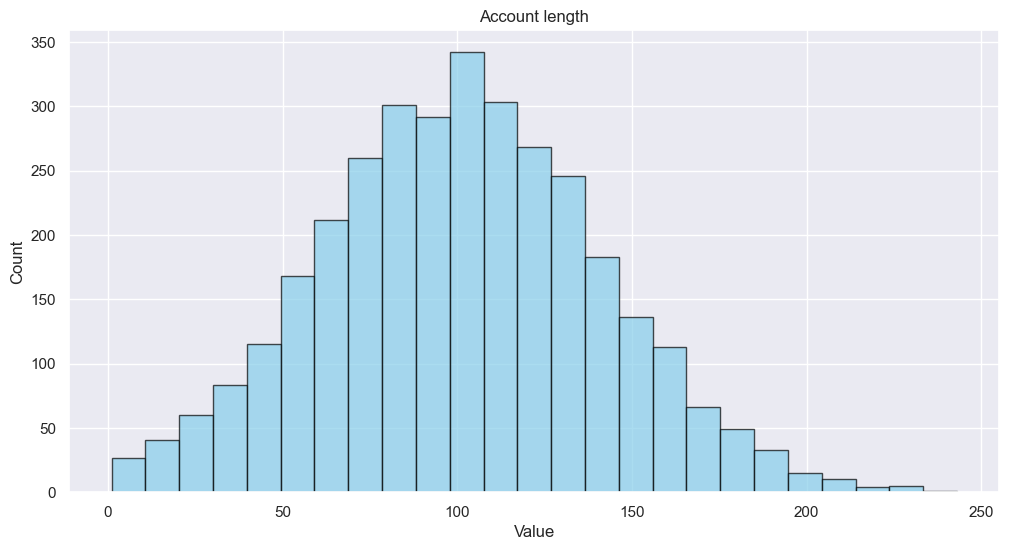

In [149]:
plt.figure(figsize=(12, 6))
plt.hist(df['account length'], bins=25, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Account length')
plt.xlabel('Value')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

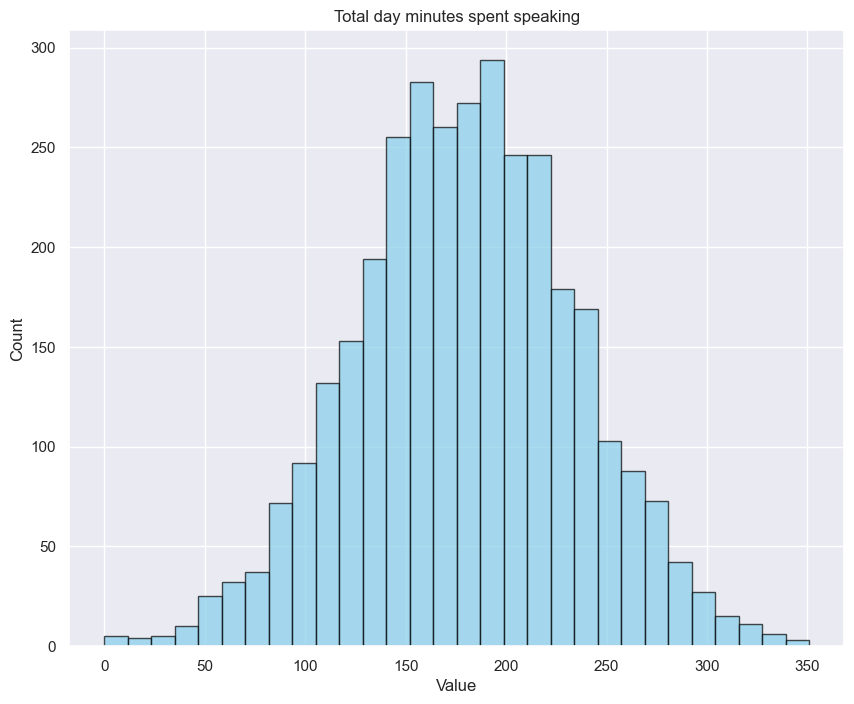

In [169]:
plt.hist(df['total day minutes'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Total day minutes spent speaking')
plt.xlabel('Value')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

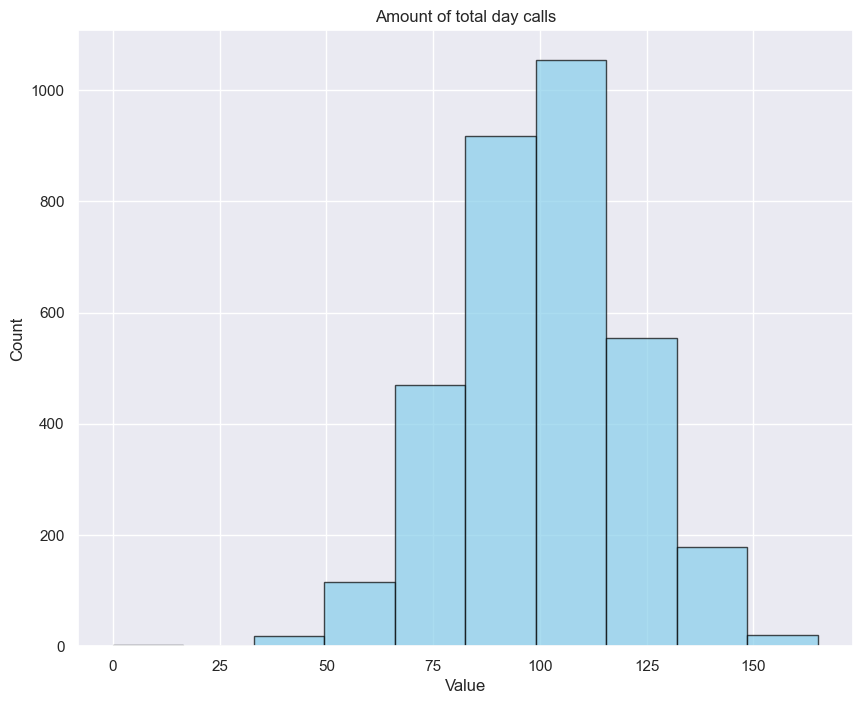

In [151]:
plt.hist(df['total day calls'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Amount of total day calls')
plt.xlabel('Value')
plt.ylabel('Count')

<Axes: ylabel='account length'>

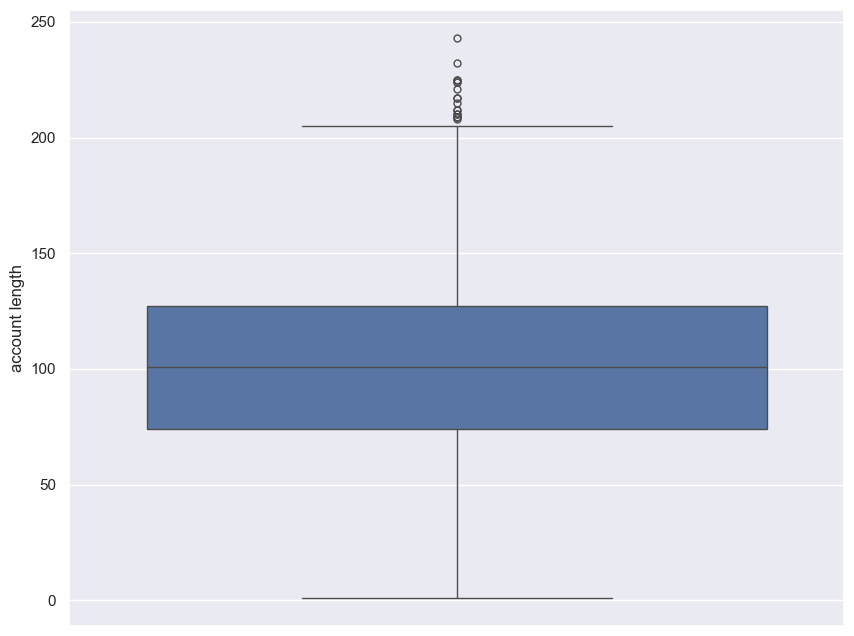

In [152]:
sns.boxplot(data=df['account length'], fliersize=5) # Check for outliers

<Axes: ylabel='total day minutes'>

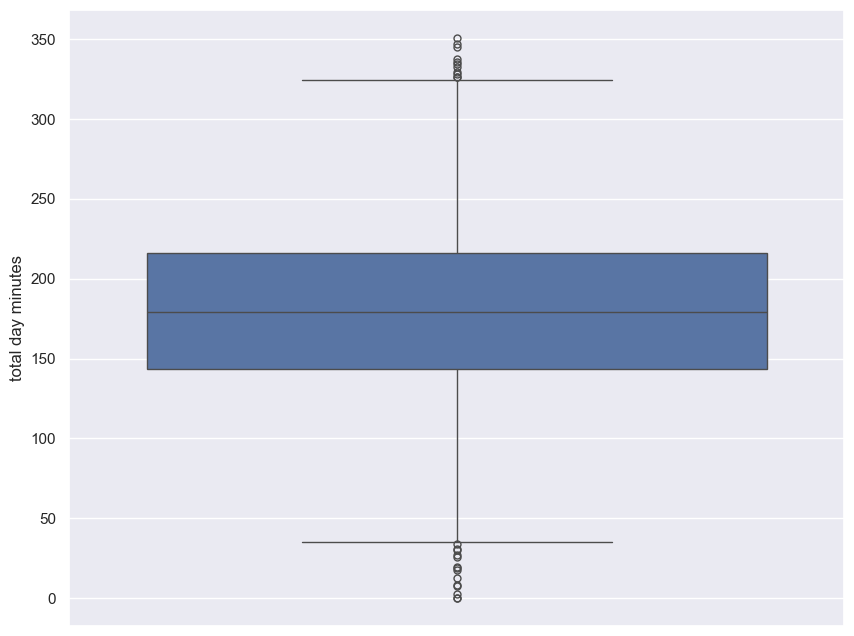

In [153]:
sns.boxplot(data=df['total day minutes'], fliersize=5) # Check for outliers

<Axes: ylabel='total day calls'>

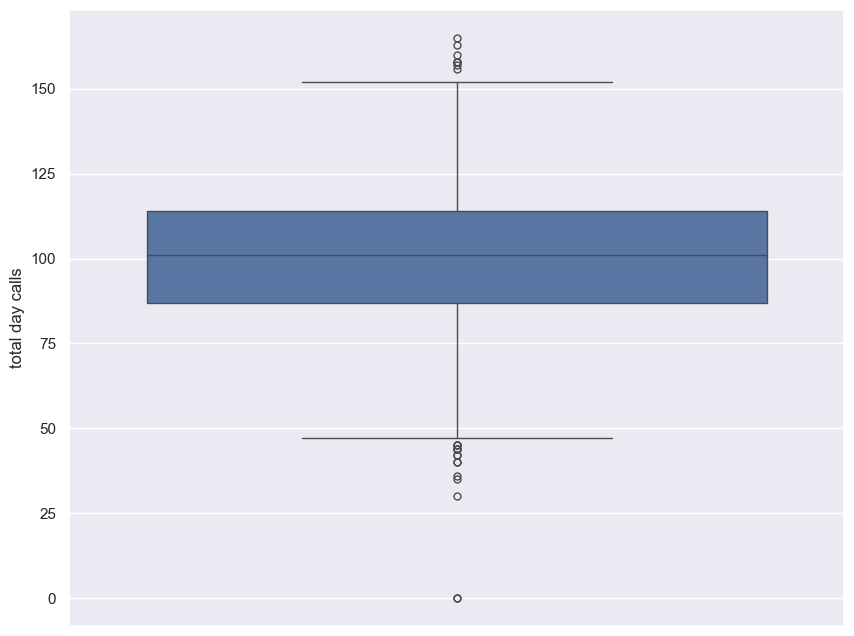

In [154]:
sns.boxplot(data=df['total day calls'], fliersize=5) # Check for outliers

* Виведіть описову статистику по категоріальним змінним. Зробіть візуалізацію розподілів найцікавіших із них.

# Convert categorial variables to numeric variables

In [155]:
df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0})
df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no': 0})
df['churn'] = df['churn'].map({True: 1, False: 0})

# No sense to describe phone numbers data, as they are unique and provide no meaning
# Therefore only describing the 'state' column

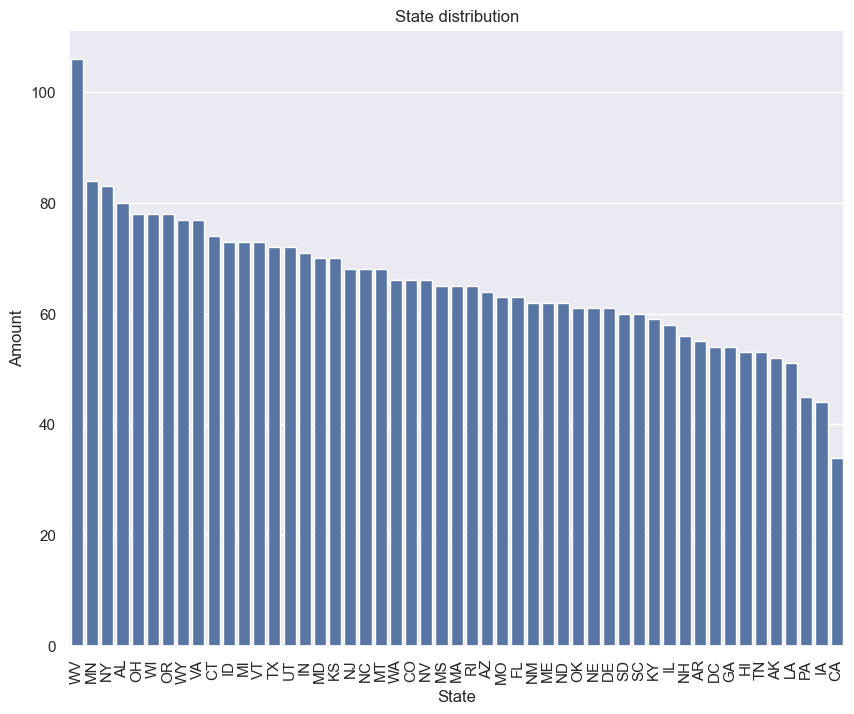

In [156]:
sns.countplot(data=df, x='state', order=df['state'].value_counts().index)
plt.title('State distribution')
plt.xlabel('State')
plt.ylabel('Amount')
plt.xticks(rotation=90)
plt.show()

## Data cleaning & Analyzing relationships

У подальших етапах за необхідності видаляйте (або заповнюйте певним чином) пропущені значення та/або викиди (outliers). Цей крок не є обов'язковим, проте слід пам'ятати, що деякі коефіцієнти кореляції та моделі чутливі до наявності нетипових значень у даних.

Яким є розподіл абонентів за цільовою ознакою **churn**? Назвіть відсоток лояльних абонентів.

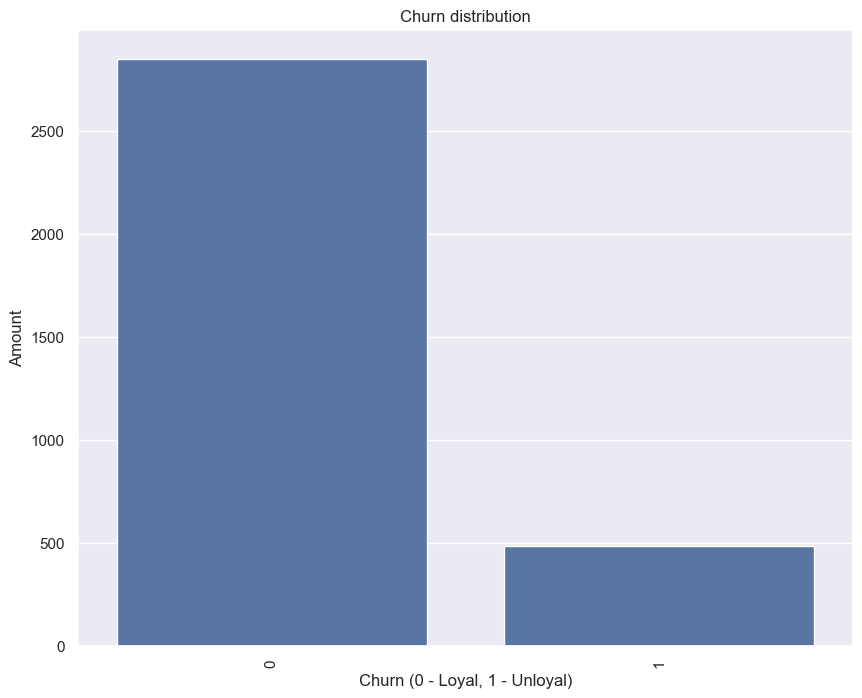

In [173]:
sns.countplot(data=df, x='churn', order=df['churn'].value_counts().index)
plt.title('Churn distribution')
plt.xlabel('Churn (0 - Loyal, 1 - Unloyal)')
plt.ylabel('Amount')
plt.xticks(rotation=90)
plt.show()

In [171]:
loyal_customers_percent = (df.loc[df['churn'] == 0].shape[0] / df['churn'].count()) * 100
print(f"Відосоток лояльних кліентів: {loyal_customers_percent}% ")

Відосоток лояльних кліентів: 85.5085508550855% 


Жителі якого штату розмовляють телефоном найбільше? менше всього? Зверніть увагу, що нас цікавлять усі види дзвінків.

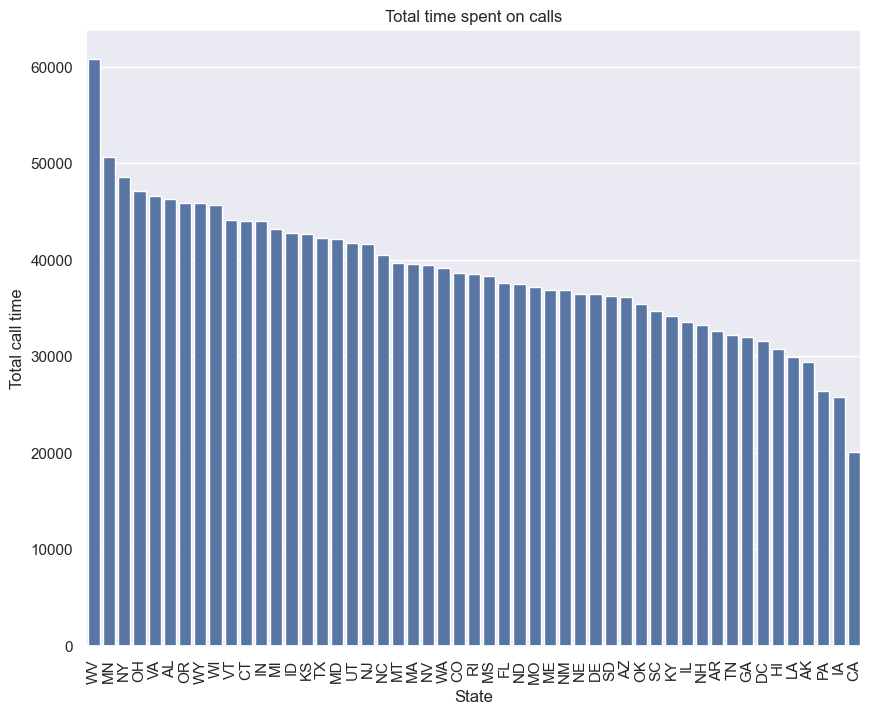

In [159]:
# Add total daily minutes column for convenience
df['total daily minutes'] = df['total day minutes'] + df['total eve minutes'] + df['total night minutes'] + df['total intl minutes']

total_minutes_by_state = df.groupby('state')['total daily minutes'].sum().reset_index().sort_values(by='total daily minutes', ascending=False)

sns.barplot(data=total_minutes_by_state, x='state', y='total daily minutes')
plt.title('Total time spent on calls')
plt.xlabel('State')
plt.ylabel('Total call time')
plt.xticks(rotation=90)
plt.show()


Чи вірно, що люди, які здійснюють багато міжнародних дзвінків, набувають **international plan**? Не забувайте про візуалізацію інформації.

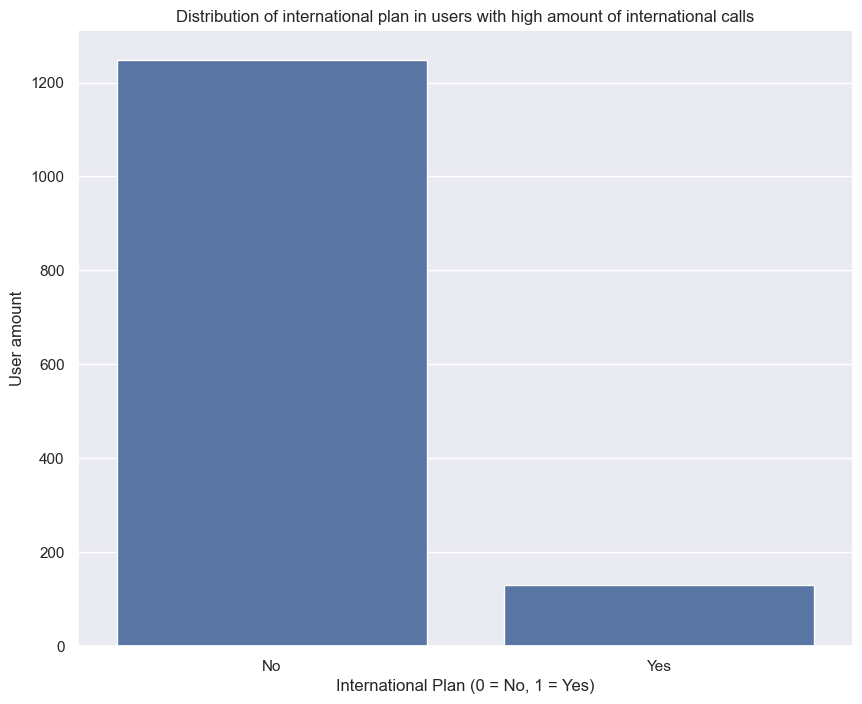

In [160]:
filtered_df = df[df['total intl calls'] > df['total intl calls'].mean()]
# filtered_df.describe()
sns.countplot(data=filtered_df, x='international plan', order=[0, 1])
plt.title('Distribution of international plan in users with high amount of international calls')
plt.xlabel('International Plan (0 = No, 1 = Yes)')
plt.ylabel('User amount')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

Як пов'язані наявність голосової пошти та міжнародного плану з лояльністю абонентів? Перевірте статистичну значущість цих зв'язків.

In [161]:
voicemail_churn_correlation = df['voice mail plan'].corr(df['churn'])
international_plan_churn_correlation = df['international plan'].corr(df['churn'])

print(f"Кореляція між голосовою поштою та лояльністю: {voicemail_churn_correlation} \nКореляція між наявністю міжнародного плану та лояльністю: {international_plan_churn_correlation}")

Кореляція між голосовою поштою та лояльністю: -0.10214814067014706 
Кореляція між наявністю міжнародного плану та лояльністю: 0.2598518473454824


# Можемо помітити, що обидва коефіціента мають вплив на лояльність абонентів, при цьому голосова пошта має негативний вплив, а міжнародний план - позитивний

Що можна сказати про взаємозв'язок кількості звернень до кол-центру та лояльності? Не забувайте про візуалізацію інформації.

In [162]:
call_centre_churn_correlation = df['customer service calls'].corr(df['churn'])
print(f"Кореляція кількості звернень до кол-центру та лояльності: {call_centre_churn_correlation}")
# Візуалізація нижче

Кореляція кількості звернень до кол-центру та лояльності: 0.2087499987837943


# Можемо помітити що коефіціент кореляції 0.2 говорить про доволі великий взаємозв'язок між кількістю звернень до кол-центру та лояльністю

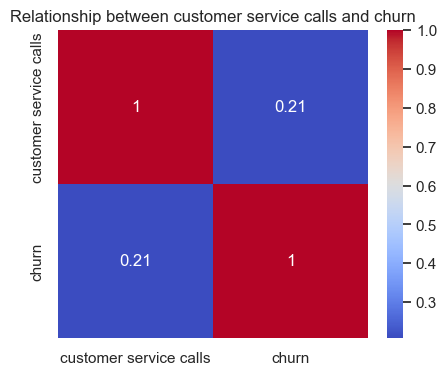

In [163]:
correlation_matrix = df[['customer service calls', 'churn']].corr()

plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Relationship between customer service calls and churn')
plt.show()

Які з числових ознак мають найбільший рівень кореляції? Чому?

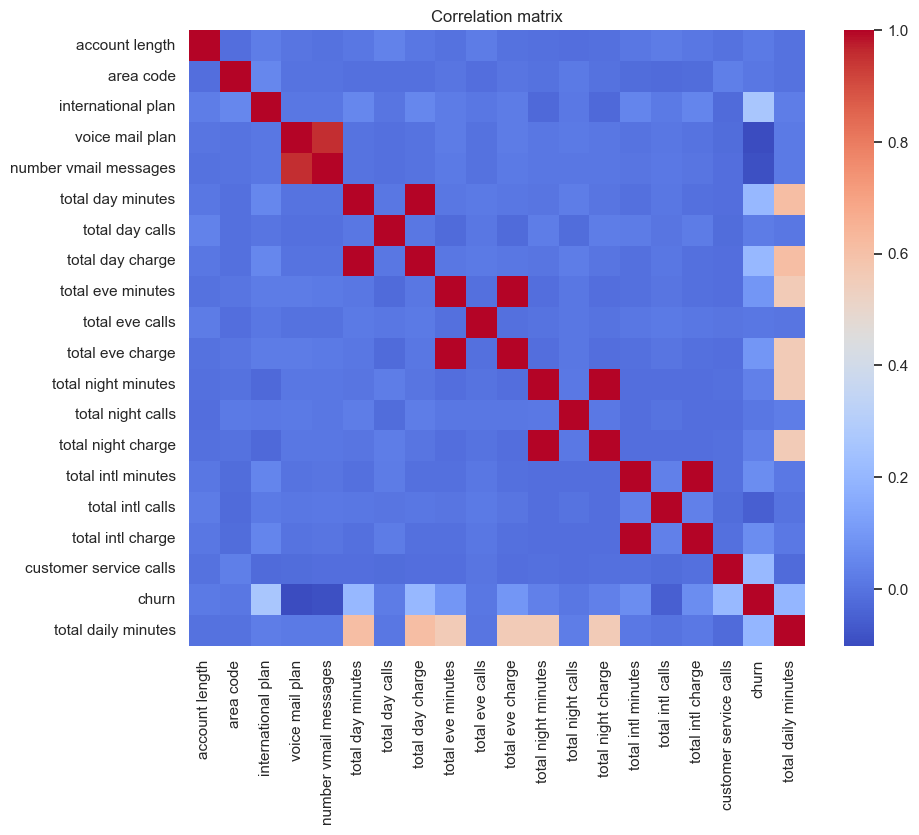

In [164]:
numbers_df = df.select_dtypes(include=['number'])
correlation_matrix = numbers_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation matrix')
plt.show()

Чи пов'язаний час користування обліковим записом із кількістю звернень до кол-центру?

In [165]:
account_length_support_calls_correlation = df['account length'].corr(df['customer service calls'])
print(f"Кореляція між часрм користування обліковим записом із кількістю звернень до кол-центру {account_length_support_calls_correlation}")

Кореляція між часрм користування обліковим записом із кількістю звернень до кол-центру -0.0037959389270460454


# Як ми бачимо, кореляція менша за 10^-3, тобто нема суттєвого зв'язку між параметрами

Які ще інсайти можна знайти в наявних даних? Творче завдання.

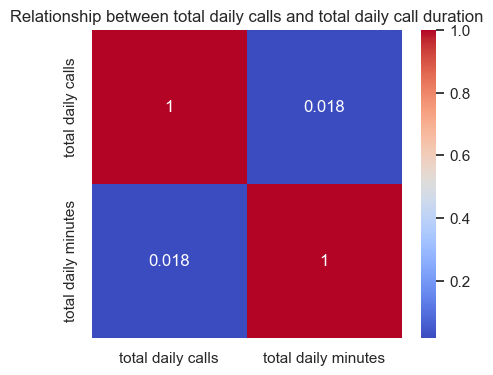

In [167]:
df['total daily calls'] = df['total day calls'] + df['total eve calls'] + df['total night calls'] + df['total intl calls']

correlation_matrix = df[['total daily calls', 'total daily minutes']].corr()

plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Relationship between total daily calls and total daily call duration')
plt.show()

# Можемо бачити, що кількість дзвінків на день не впливає на тривалість дзвінків

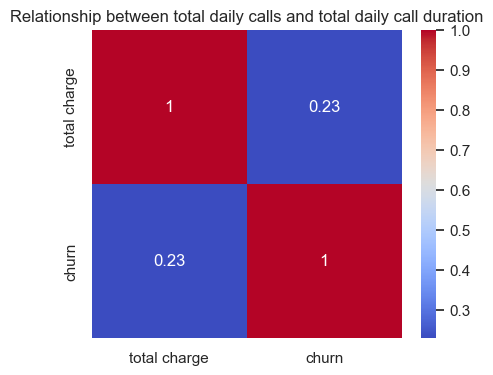

In [168]:
df['total charge'] = df['total day charge'] + df['total eve charge'] + df['total night charge'] + df['total intl charge']

correlation_matrix = df[['total charge', 'churn']].corr()

plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Relationship between total charge and churn')
plt.show()

# Можемо бачити, що те, скільки кліенти платять за дзвінки доволі сильно впливає на їх лояльність